<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/supervised/ML_Bootcamp_10_decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='0'></a> Import bibliotek


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.0.2'

### <a name='1'></a> Wygenerowanie danych


In [2]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(f'{data[:5]}\n')
print(target[:5])

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]]

[18795.440426  3481.301662  5866.345958  3697.116539    78.964854]


### <a name='2'></a> Regresja liniowa


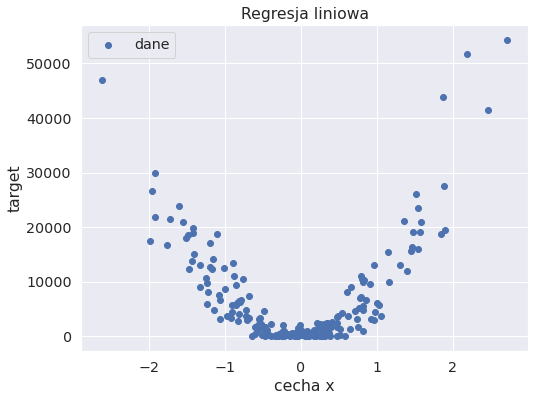

In [3]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

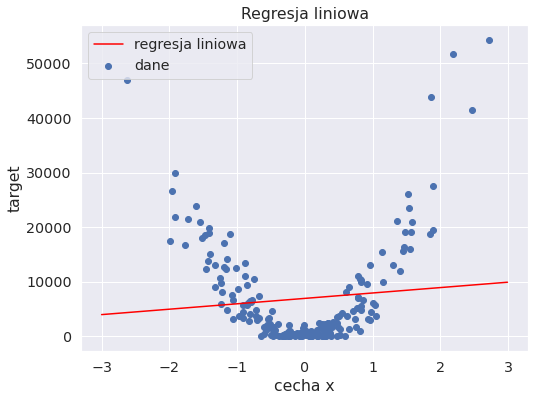

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data, target)

plot_data = np.arange(-3, 3, 0.01).reshape(-1,1)

plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.plot(plot_data, model.predict(plot_data), c ='red', label='regresja liniowa')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

### <a name='3'></a> Regresja drzew decyzyjnych


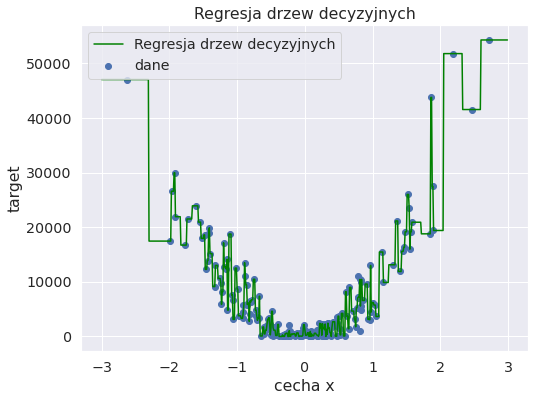

In [8]:
from sklearn.tree import DecisionTreeRegressor
#nie ustawiamy parametrów, drzewo działa na parametrach domyslnych aż do momentu kiedy przestanie dokonywać podziału
model = DecisionTreeRegressor()
model.fit(data, target)

plt.figure(figsize=(8,6))
plt.title('Regresja drzew decyzyjnych')
plt.plot(plot_data, model.predict(plot_data), c ='green', label='Regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

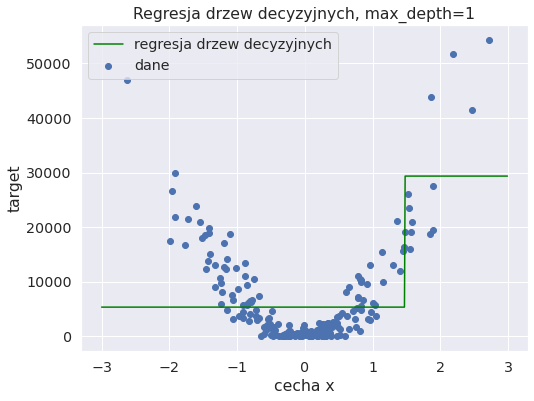

In [10]:
#max_depth = 1
model_1 = DecisionTreeRegressor(max_depth=1)
model_1.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'Regresja drzew decyzyjnych, max_depth=1')
plt.plot(plot_data, model_1.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

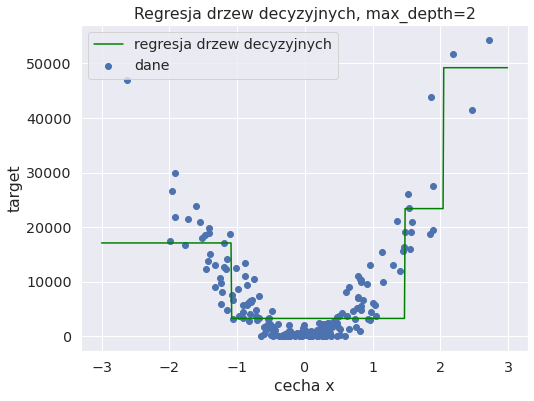

In [11]:
#max_depth = 2
model_2 = DecisionTreeRegressor(max_depth=2)
model_2.fit(data, target)

plt.figure(figsize=(8,6))
plt.title(f'Regresja drzew decyzyjnych, max_depth=2')
plt.plot(plot_data, model_2.predict(plot_data), c='green', label='regresja drzew decyzyjnych')
plt.scatter(data, target, label='dane')
plt.legend()
plt.xlabel('cecha x')
plt.ylabel('target')
plt.show()

### <a name='4'></a> Graf drzewa decyzyjnego


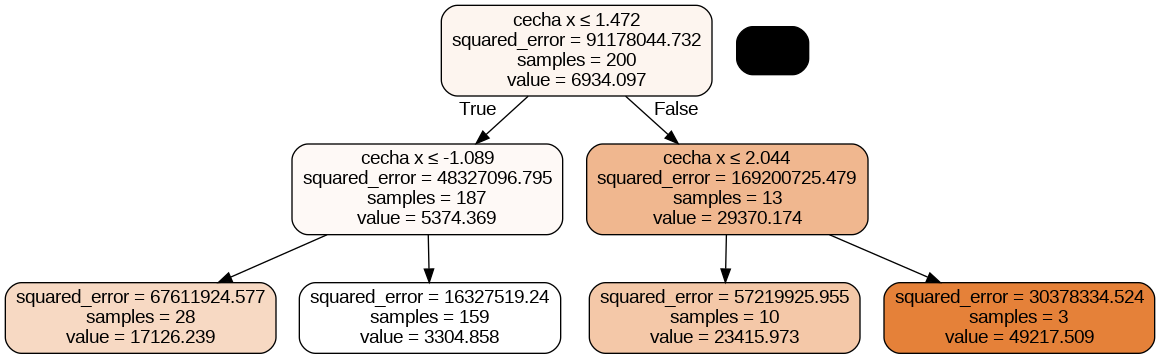

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model_2, out_file=dot_data,
                filled = True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)

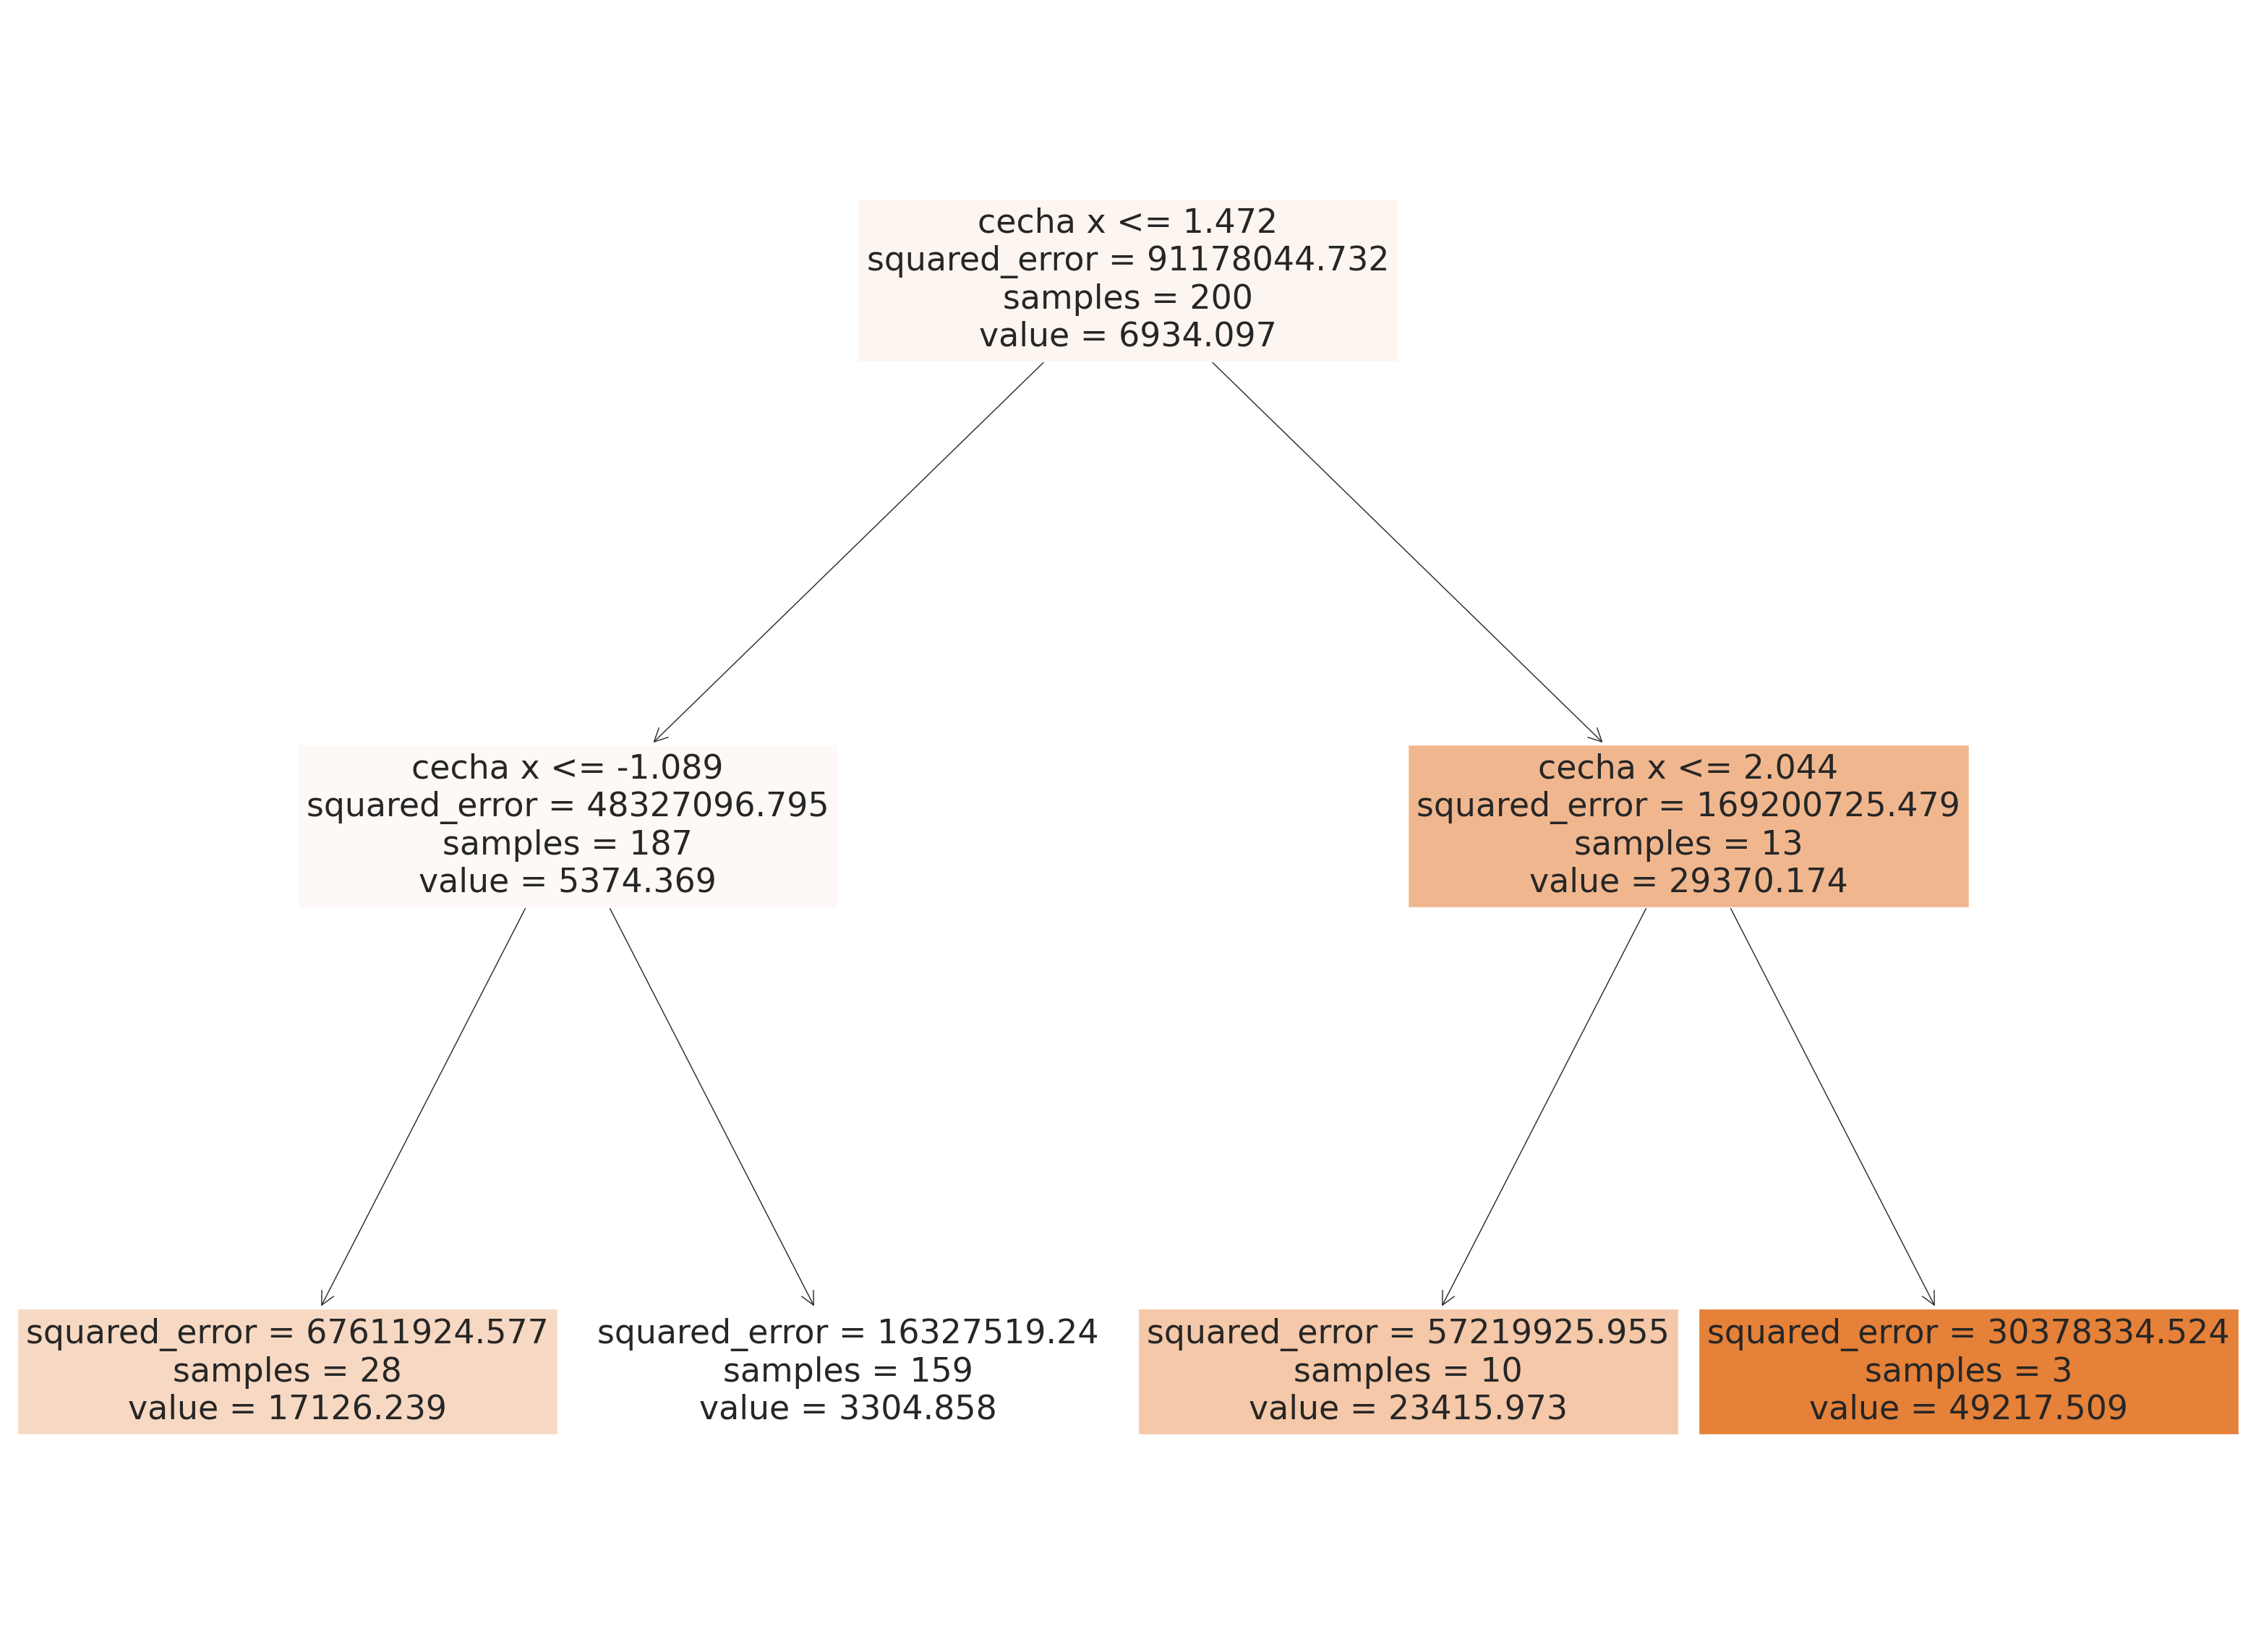

In [15]:
from sklearn import tree
fig = plt.figure(figsize=(40,30), dpi=100) #dpi jakosc obrazu im wieksza tym lepsza jakosc ale ciezszy plik
tree_plot = tree.plot_tree(model_2, feature_names=['cecha x'], filled=True)

### <a name='5'></a> Model drzewa decyzyjnego - budowa funkcji


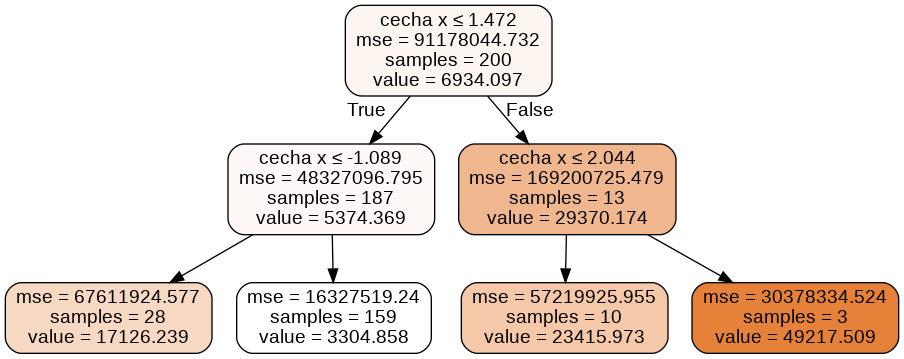

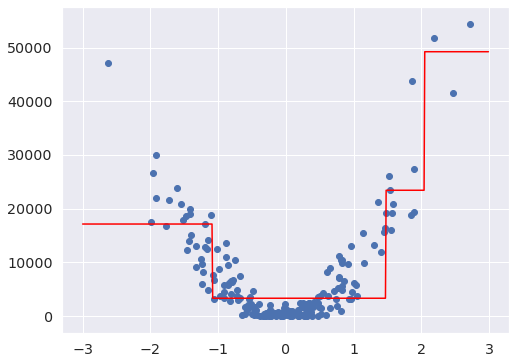

In [ ]:
def make_dt_regression(max_depth=2):
    regressor = DecisionTreeRegressor(max_depth=max_depth)
    regressor.fit(data, target)

    plt.figure(figsize=(8, 6))
    plt.plot(plot_data, regressor.predict(plot_data), c='red')
    plt.scatter(data, target)

    dot_data = StringIO()
    export_graphviz(regressor, out_file=dot_data,
                   filled=True, rounded=True,
                   special_characters=True,
                   feature_names=['cecha x'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    return Image(graph.create_png(), width=300 + max_depth * 100)
    
make_dt_regression(max_depth=2)    

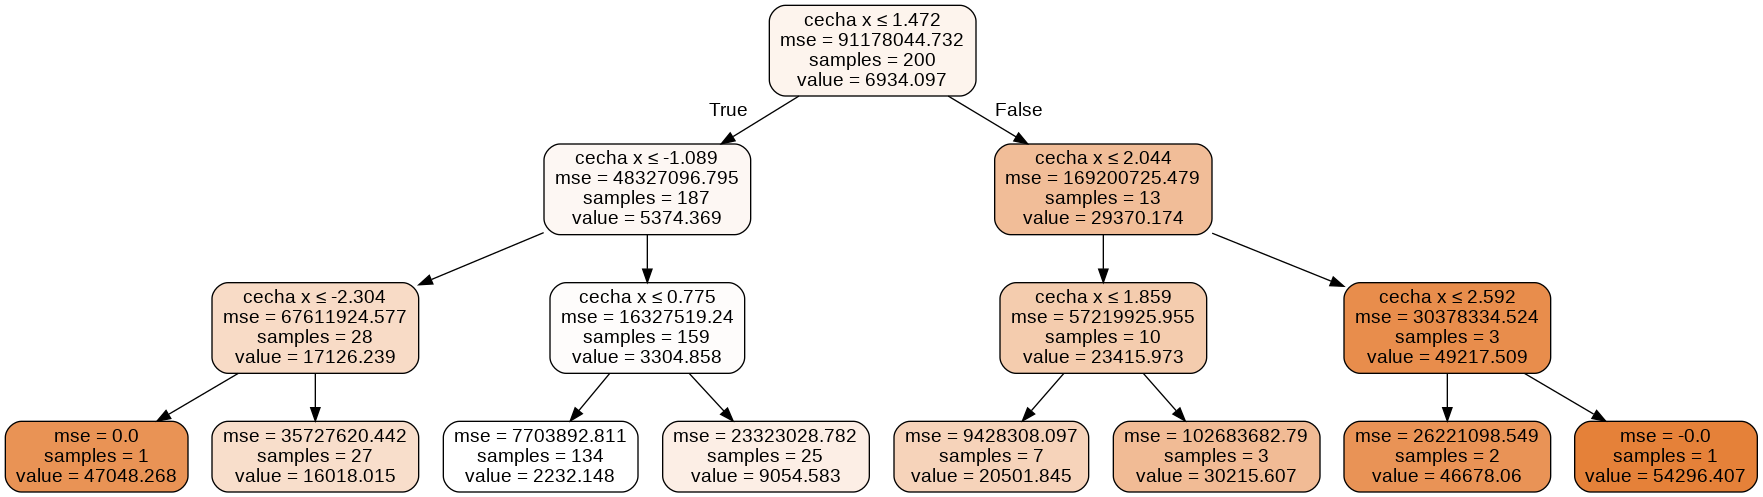

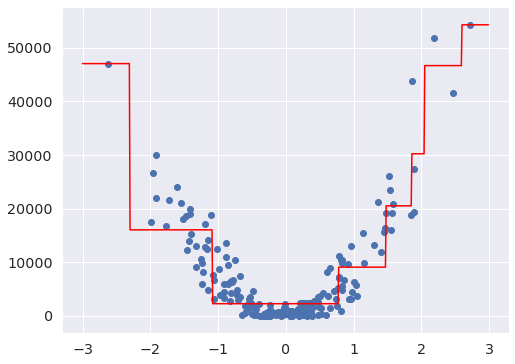

In [ ]:
make_dt_regression(max_depth=3)

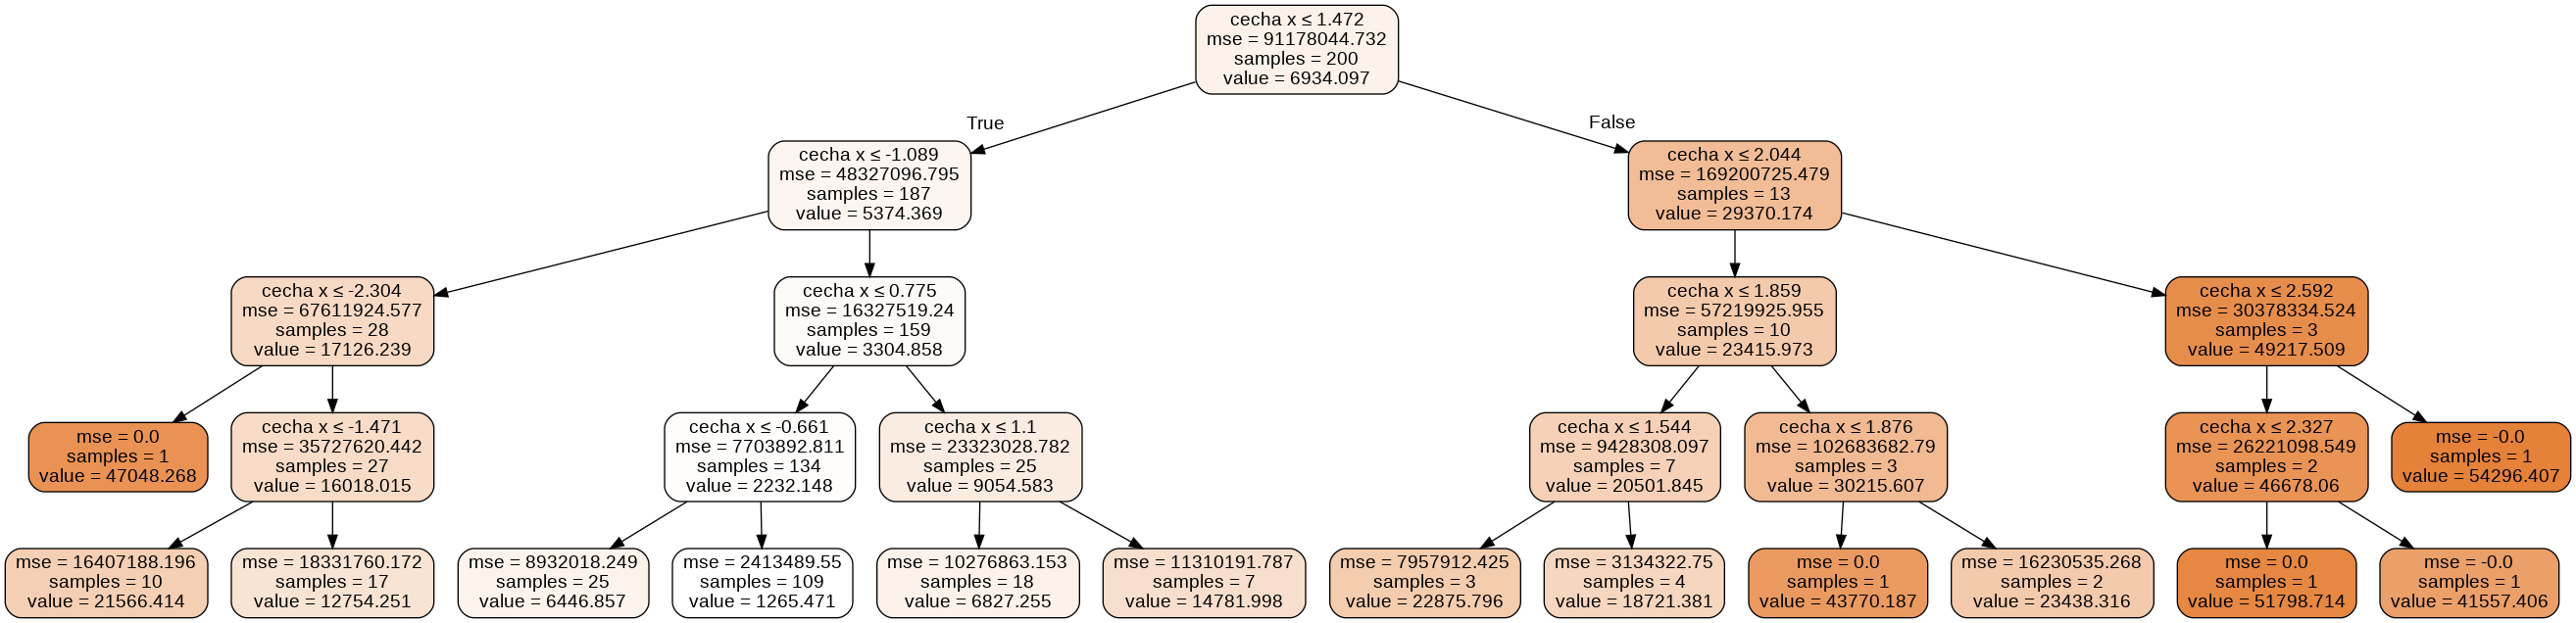

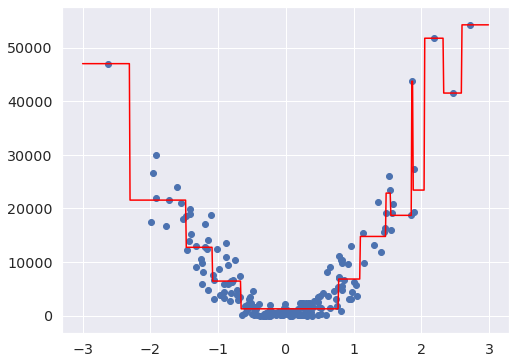

In [ ]:
make_dt_regression(max_depth=4)